# Example of dataset using environmental rasters and sentinel imagery

This is an example code of how tu use provided data providers and dataset to create a pytorch dataset based on patches data.

Importing the providers and dataset objects:

In [1]:
from data.GLC23PatchesProviders import MultipleRasterPatchProvider, RasterPatchProvider, JpegPatchProvider
from data.GLC23Datasets import PatchesDataset

Define the list of providers: Providers are datareaders specific to a type of patch. ``JpegPatchProvider`` allows to find and load a jpeg patches from a 'patchID', ``MultipleRasterPatchProvider`` and ``RasterPatchProvider`` allow to read in one or multiple rasters to extract patches given coordinates. You need to configure the list of providers for the data you want to include in the tensor.

In [2]:
data_path = 'data/sample_data/' # root path of the data
# configure providers
p_hfp_d = MultipleRasterPatchProvider(data_path+'EnvironmentalRasters/HumanFootprint/detailed/') # take all rasters from human footprint detailed (2 rasters here)
p_bioclim = MultipleRasterPatchProvider(data_path+'EnvironmentalRasters/Climate/BioClimatic_Average_1981-2010/', select=['bio1', 'bio2']) # take only bio1 and bio2 from bioclimatic rasters (2 rasters from the 3 in the folder)
p_hfp_s = RasterPatchProvider(data_path+'EnvironmentalRasters/HumanFootprint/summarized/HFP2009_WGS84.tif') # take the human footprint 2009 summurized raster (a single raster)
p_rgb = JpegPatchProvider(data_path+'SatelliteImages/') # take all sentinel imagery layer (r,g,b,nir = 4 layers)

Construct the dataset object given the list of providers and the occurrences csv file: The ``PatchesDataset`` class inherit from the ``Dataset`` class of ``torch.utils.data``.

In [3]:
# create dataset
dataset = PatchesDataset(
    occurrences=data_path+'Presence_only_occurrences/Presences_only_train_sample.csv',
    providers=(p_hfp_d, p_bioclim, p_hfp_s, p_rgb))

After construction the ``PatchesDataset`` can return a tensor given an index of data.
Testing the dataset on random occurrences from the sample data:

Tensor type: <class 'torch.Tensor'>, tensor shape: torch.Size([9, 128, 128]), label: 6826


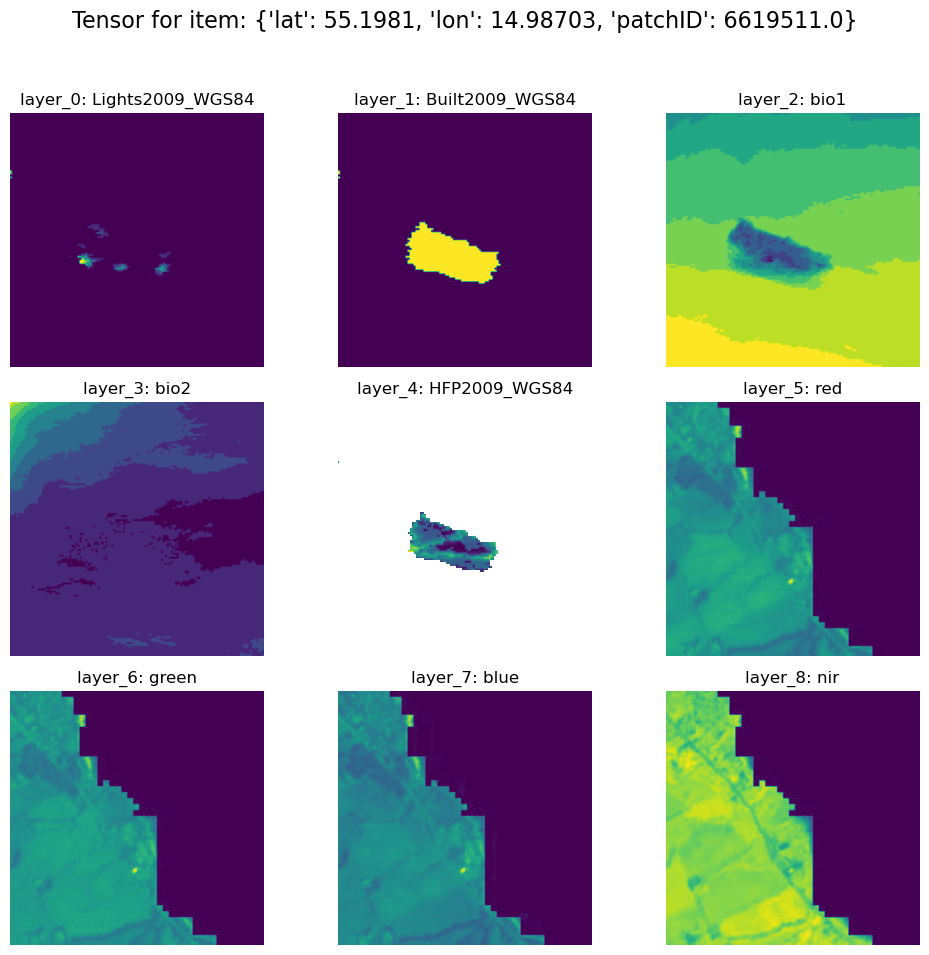

Tensor type: <class 'torch.Tensor'>, tensor shape: torch.Size([9, 128, 128]), label: 9540


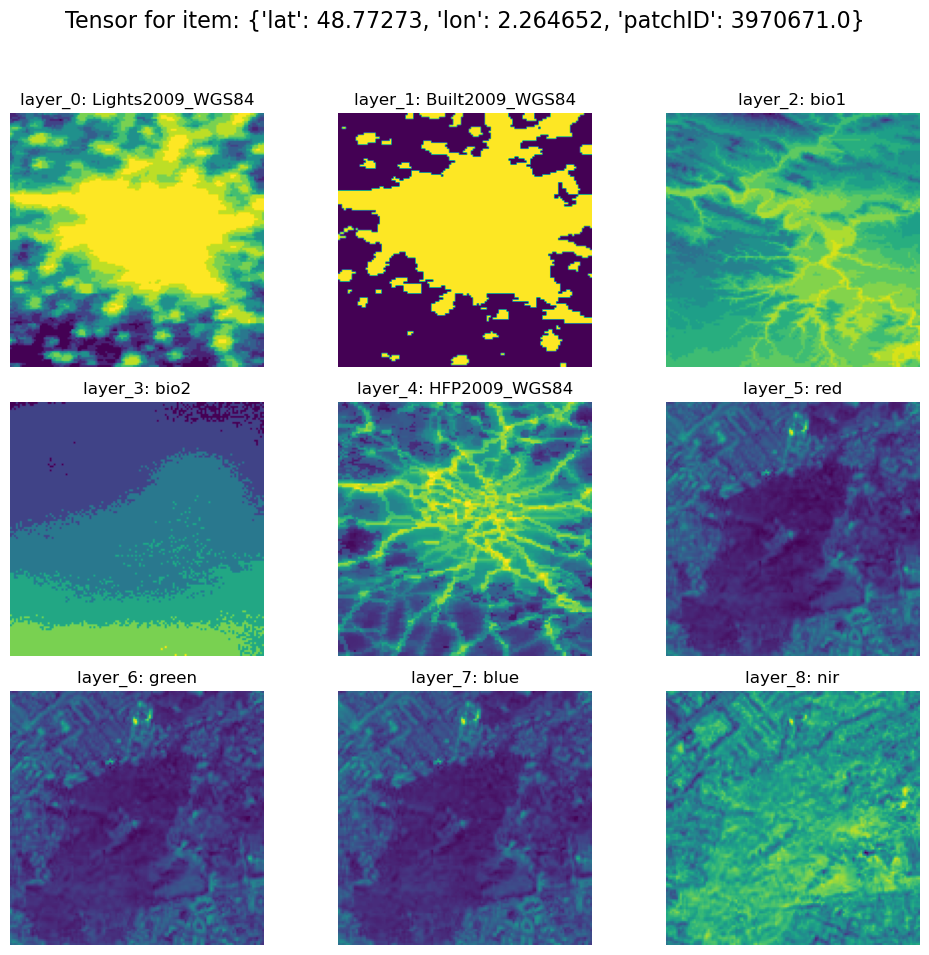

Tensor type: <class 'torch.Tensor'>, tensor shape: torch.Size([9, 128, 128]), label: 7583


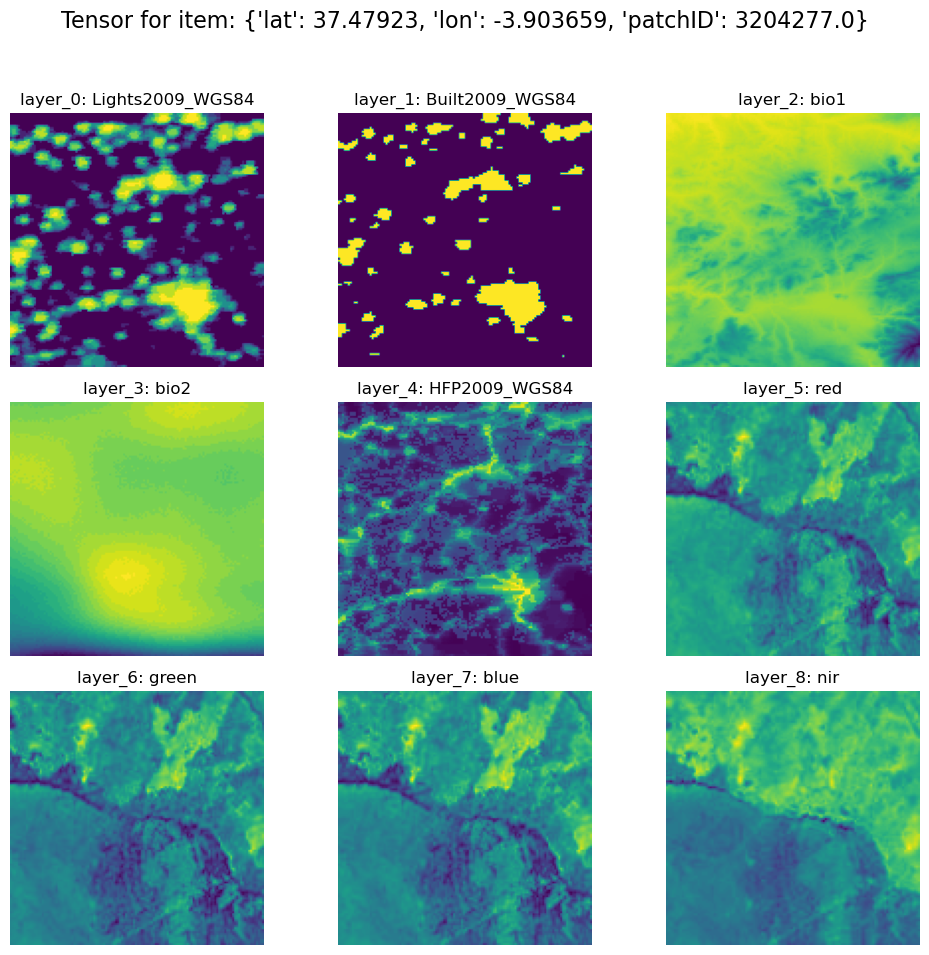

Tensor type: <class 'torch.Tensor'>, tensor shape: torch.Size([9, 128, 128]), label: 2752


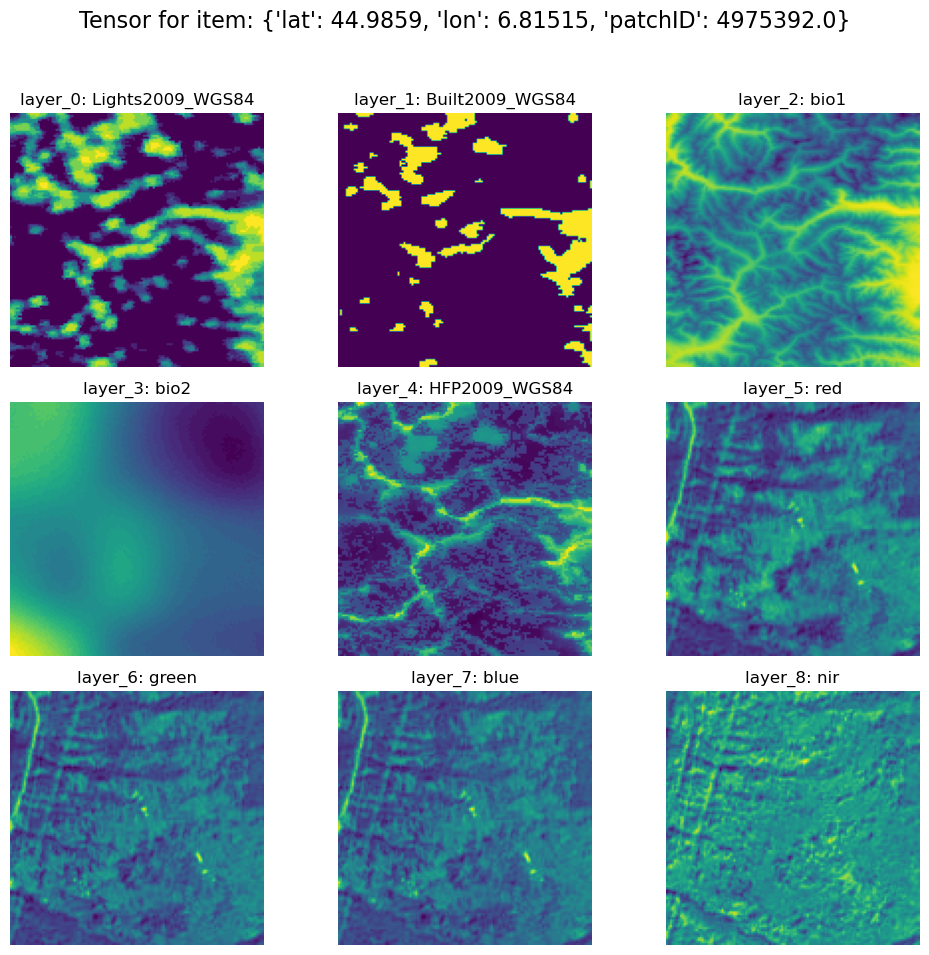

Tensor type: <class 'torch.Tensor'>, tensor shape: torch.Size([9, 128, 128]), label: 3852


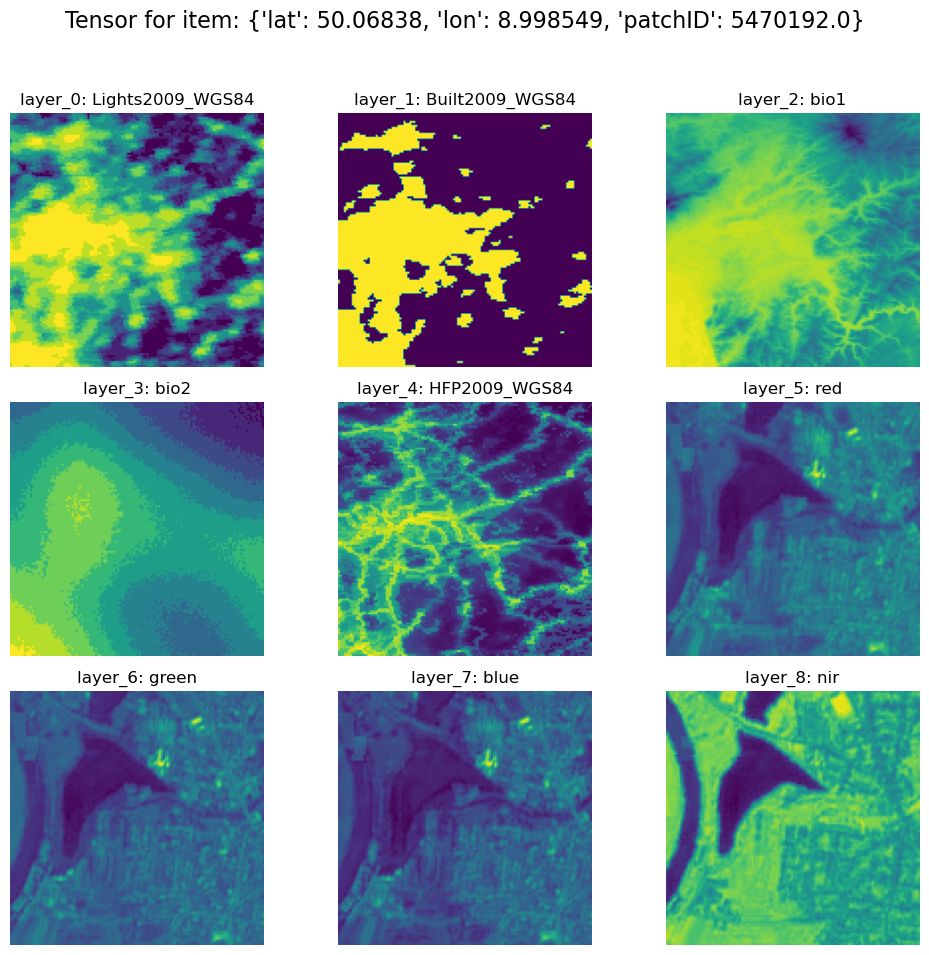

In [4]:
import random

# print random tensors from dataset
ids = [random.randint(0, len(dataset)-1) for i in range(5)]
for id in ids:
    tensor, label = dataset[id]
    print('Tensor type: {}, tensor shape: {}, label: {}'.format(type(tensor), tensor.shape, label))
    dataset.plot_patch(id)

The ``PatchesDataset`` can be then wrap in a torch dataloader:

In [8]:
import torch

train_loader = torch.utils.data.DataLoader(dataset, shuffle=True, batch_size=64,  num_workers=8)

first_batch_tensor, first_batch_labels = next(iter(train_loader))
print(first_batch_tensor)
print(first_batch_tensor.shape)

tensor([[[[ 2.0000e+00,  2.0000e+00,  3.0000e+00,  ...,  5.0000e+00,
            5.0000e+00,  0.0000e+00],
          [ 3.0000e+00,  3.0000e+00,  3.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 4.0000e+00,  4.0000e+00,  4.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          ...,
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00]],

         [[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00, -2.1475e+09],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -2.1475e+09,
           -2.1475e+09, -2.1475e+09],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -2.1475e+09,
           -2.1475e+09, -2.1475e+09],
          ...,
     